## Data Analysis

In [1]:
#import all relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import figure
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [2]:
df = pd.read_csv(r'../Dataset/covtype.csv',index_col=None, nrows=10000)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


### Data Cleaning
Removal of unnecessary columns from the dataset that doesn't help in predicting our dependent variable

In [3]:
#droping the columns with low standard deviation/high skewness as performed above
remaining=['Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']


In [4]:
#removing all above columns with low standard deviation as it will not impact our dependent variable
df.drop(remaining, axis=1, inplace=True)

In [5]:
# we will also remove Hillshade_3pm because of highly neagtive -0.78 co-related value
df.drop('Hillshade_3pm',axis=1, inplace=True)

In [6]:
#Final Data Set after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
Elevation                             10000 non-null int64
Aspect                                10000 non-null int64
Slope                                 10000 non-null int64
Horizontal_Distance_To_Hydrology      10000 non-null int64
Vertical_Distance_To_Hydrology        10000 non-null int64
Horizontal_Distance_To_Roadways       10000 non-null int64
Hillshade_9am                         10000 non-null int64
Hillshade_Noon                        10000 non-null int64
Horizontal_Distance_To_Fire_Points    10000 non-null int64
Wilderness_Area1                      10000 non-null int64
Wilderness_Area2                      10000 non-null int64
Wilderness_Area3                      10000 non-null int64
Wilderness_Area4                      10000 non-null int64
Soil_Type1                            10000 non-null int64
Soil_Type2                            10000 non-null int64
Soil_Ty

### Data Modeling

Here we split our main data set into two forms X and Y <br />

X -> List of independent variables <br />
Y -> Dependent Variables<br />

In [7]:
X=df.loc[:,'Elevation':'Soil_Type40']
y=df['Cover_Type']

In [8]:
#Splitting the data into  train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

## Gradient Boosting Classifier

In [9]:
# implementing the model by passing parameters
gb = GradientBoostingClassifier(
  n_estimators=40, 
  learning_rate = 0.75, 
  max_features=44, 
  max_depth = 2, 
  random_state = 12)

In [10]:
%%time

# fitting the model and getting the accuracy
gb.fit(X_train, y_train)
print("Accuracy (training): {0:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy (validation): {0:.3f}".format(gb.score(X_test, y_test)))
y_pred = gb.predict(X_test)

Accuracy (training): 0.865
Accuracy (validation): 0.773
Wall time: 4.49 s


Text(0, 0.5, 'Feature Importance Score')

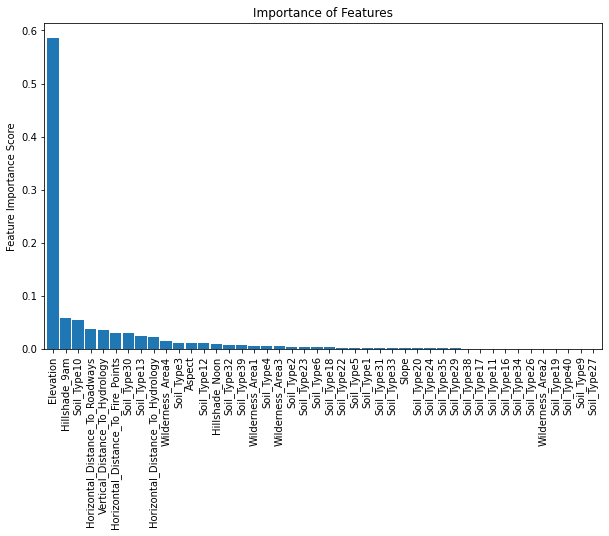

In [11]:
# evaluating all the important features from our training set
predictors=list(X_train)
feat_imp = pd.Series(gb.feature_importances_, predictors).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
feat_imp.plot(kind='bar', title='Importance of Features',width=0.9)
plt.ylabel('Feature Importance Score')

## Hyperparameter Tuning

#### n_estimators captures the number of trees that we add to the model. A high number of trees can be computationally expensive. Generally, with a change in learning rate,n_estimators should also be adjusted (10-fold decrease in learning_rate should go in line with a approx. 10-fold increase in n_estimators.

In [12]:
%%time

p_test3 = {'learning_rate':[0.1, 0.25, 0.5, 0.75, 1], 'n_estimators':[500,750,1000,1500]}

tuning = GridSearchCV(estimator = GradientBoostingClassifier(max_depth=4, max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(X_train,y_train)

Wall time: 45min 23s


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=4,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
       

In [13]:
print(tuning.best_params_, tuning.best_score_)

{'learning_rate': 0.1, 'n_estimators': 1000} 0.8367142857142857


### After Hyper Parameter tuning

In [27]:
gb = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None, learning_rate=0.1,
        loss='deviance', max_depth=4, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 
        min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, 
        n_estimators=1000, n_iter_no_change=None, presort='deprecated', random_state=10, subsample=1.0, tol=0.0001, 
        validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
%%time
gb.fit(X_train, y_train)

Wall time: 54.7 s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [29]:
print("Accuracy (training): {0:.3f}".format(gb.score(X_train, y_train)*100))
print("Accuracy (validation): {0:.3f}".format(gb.score(X_test, y_test)*100))
y_pred = gb.predict(X_test)

Accuracy (training): 100.000
Accuracy (validation): 85.633


Confusion Matrix:
[[305  72   0   0   9   2  26]
 [ 63 300  10   0  38   7   4]
 [  0   2 306  25   6  46   0]
 [  0   0   8 473   0   7   0]
 [  2  19   3   0 439   6   0]
 [  0   0  44   7   5 338   0]
 [ 20   0   0   0   0   0 408]]


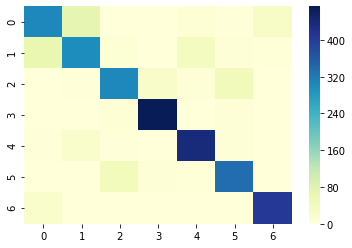

In [30]:
print("Confusion Matrix:")
CM = confusion_matrix(y_test, y_pred)
print(CM)
sns.heatmap(CM,cmap="YlGnBu")
plt.show()

In [31]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.78      0.74      0.76       414
           2       0.76      0.71      0.74       422
           3       0.82      0.79      0.81       385
           4       0.94      0.97      0.95       488
           5       0.88      0.94      0.91       469
           6       0.83      0.86      0.84       394
           7       0.93      0.95      0.94       428

    accuracy                           0.86      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.86      0.85      3000



## Inference

Initially after implementing our Gradient boosting algorithm we got accuracy 77.30%. So to get a better accuracy we perforemed hyperparameter tuning and achieved a better accuracy of 85.63%. 